In [1]:
%%javascript

window.load_remote_theme = false
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme)
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from pylab import plot,show
from scipy import stats

## Load data

In [3]:
skin = pd.read_table('skin.tsv', header=None, names=['B', 'G', 'R', 'y'])
skin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B    245057 non-null int64
G    245057 non-null int64
R    245057 non-null int64
y    245057 non-null int64
dtypes: int64(4)

In [4]:
skin.head()

,B,G,R,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


## EDA

In [5]:
skin['y'].unique()

array([1, 2])

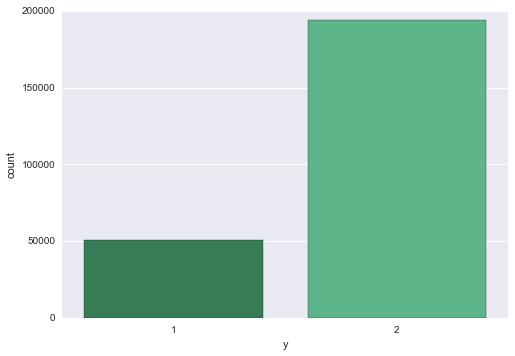

In [6]:
sns.barplot(skin['y'], palette="BuGn_d")

Clearly there are many more 2s than 1s.  This is important to note for when we create our training set, as we will need to balance out the 1s and 2s into an even amount

(array([ 19631.,  15760.,  32038.,  18755.,  21679.,  31788.,  52638.,
         42150.,   4675.,   5943.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

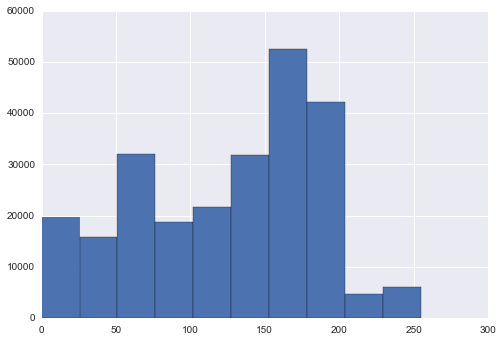

In [7]:
plt.hist(skin['B'])

(array([ 18054.,  11316.,  24914.,  18744.,  17518.,  31224.,  68014.,
         45159.,   6074.,   4040.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

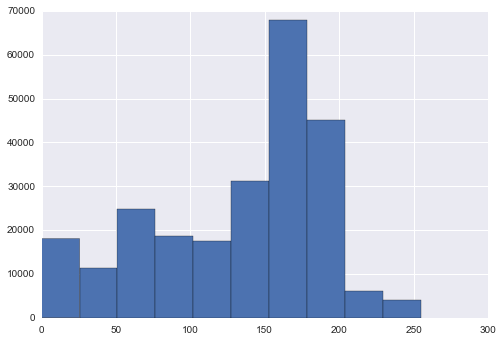

In [8]:
plt.hist(skin['G'])

(array([ 39435.,  14409.,   9178.,  19372.,  39690.,  42192.,  26623.,
          9696.,  22914.,  21548.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

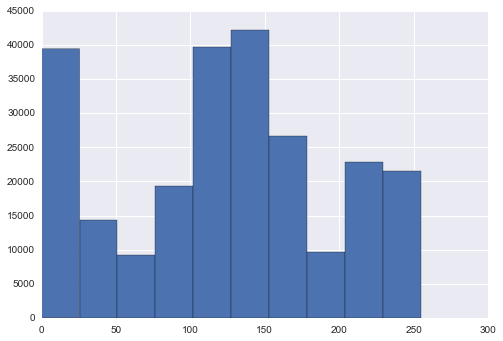

In [9]:
plt.hist(skin['R'])

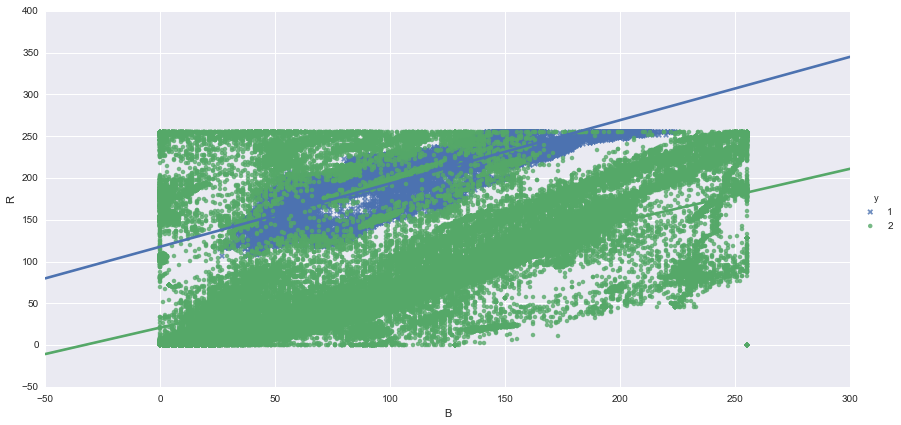

In [10]:
sns.lmplot("B", "R", skin, hue="y", markers=["x", "o"], size=6, aspect=2);

In [11]:
from matplotlib.colors import ListedColormap
from sklearn import feature_selection
from sklearn.neighbors import KNeighborsClassifier as KNN

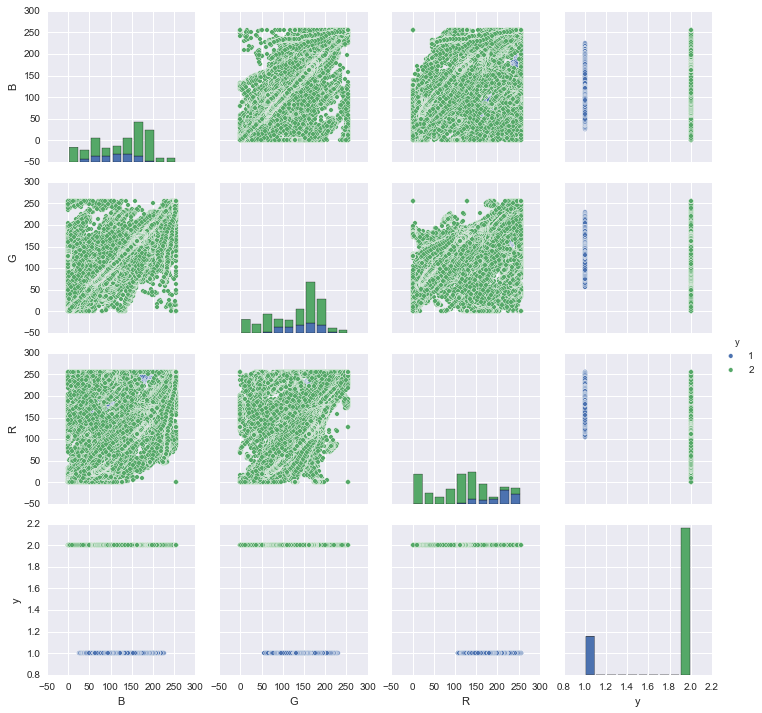

In [12]:
sns.pairplot(skin, hue="y", size=2.5);

We can see from the above graphs that R looks to be the best indicator of skin

## Splitting into Training / Test set

The first thing to do is split out our training data, making sure that there are an equal number of 1s and 2s (y variable).

In [13]:
skin.y.value_counts()

2    194198
1     50859
dtype: int64

In [14]:
# limit the class size to the smallest class
n = min(skin.y.value_counts())
n

50859

In [15]:
# what's the majority class?
max_class = int(skin.y.value_counts().idxmax())
max_class

2

In [16]:
# random sample the rows from the majority class up 
# to the size of the minority class.
import random
max_rows = random.sample(skin[skin.y == max_class].index, n)
len(max_rows)

50859

In [17]:
# what's the minority class?
min_class = int(skin.y.value_counts().idxmin())
min_class

1

In [18]:
# select all the rows of the minority class
min_rows = skin[skin.y == min_class].index
len(min_rows)

50859

In [19]:
# combine the rows from both classes
rows = np.r_[min_rows, max_rows]
len(rows)

101718

In [20]:
# Finally we have a dataset with balances classes
skin.ix[rows,'y'].value_counts()

2    50859
1    50859
dtype: int64

We have now removed the class imbalance

In [23]:
skin.ix[rows, :-1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101718 entries, 0 to 71380
Data columns (total 3 columns):
B    101718 non-null int64
G    101718 non-null int64
R    101718 non-null int64
dtypes: int64(3)

In [24]:
X = skin.ix[rows,:-1]
y = skin.ix[rows,-1]

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.30, random_state=12)

In [26]:
n_neighbors = range(1,51,2)

In [27]:
scores = []
for n in n_neighbors:
    clf = KNN(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

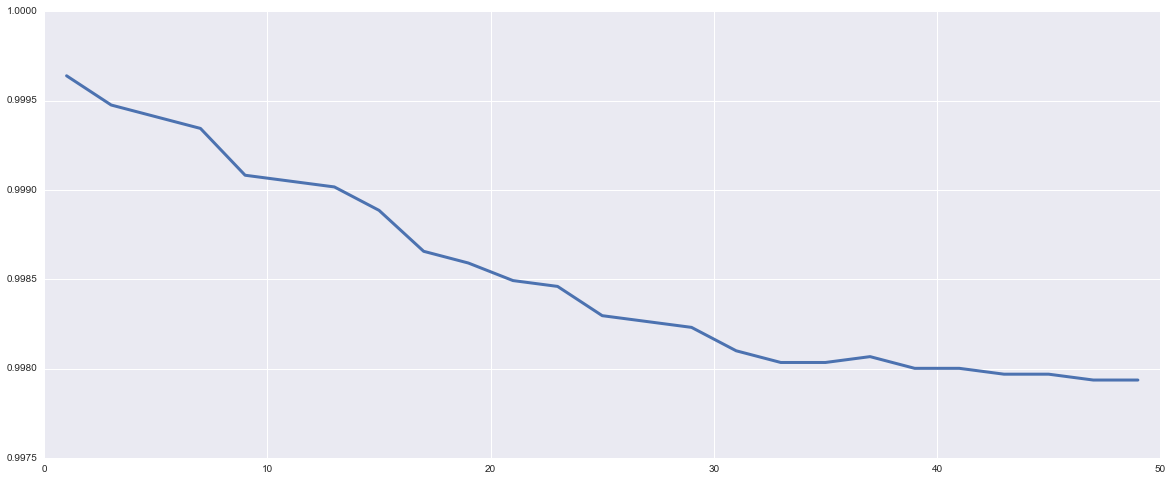

In [28]:
plt.figure(figsize=(20,8))
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.show()

The work above shows that at a low number of neighbors, we can get the best result.

In [29]:
n_neighbors = range(1,11,2)

In [30]:
scores = []
for n in n_neighbors:
    clf = KNN(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

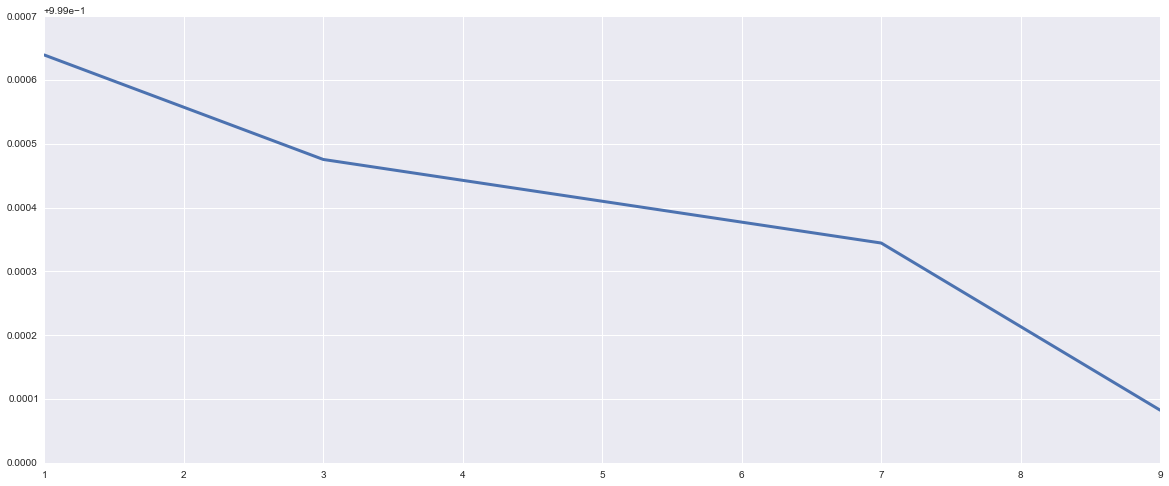

In [31]:
plt.figure(figsize=(20,8))
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.show()

1 neighbour appears to be the best fit

## Cross validation

In [32]:
scores = []
idx = np.random.uniform(0, 1, len(X)) >= 0.3
for n in range(5):
    np.random.shuffle(idx)
    X_train, X_test = X[idx], X[idx == False]
    y_train, y_test = y[idx], y[idx == False]
    clf = KNN(1, weights='uniform')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

In [33]:
scores

[0.99964278755601743,
 0.99961031369747355,
 0.99970773527310519,
 0.99964278755601743,
 0.99954536598038579]

In [34]:
np.mean(scores)

0.99962979801259988

This mean score is high at 99.96%.  So it seems to be a strong model.

##Simplifying the Model

The next step is to simplify the model, by finding the most significant features in the model. 

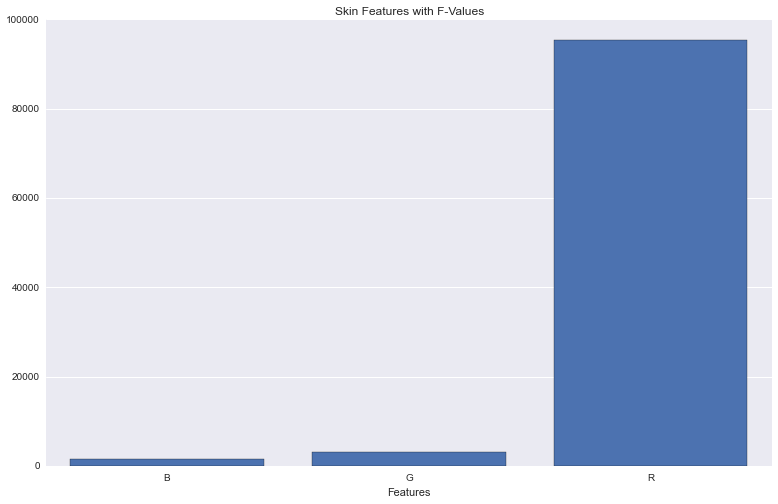

In [35]:
# Find the most powerful features in the model.

F = feature_selection.f_classif(X, y)[0]
title = 'Skin Features with F-Values'

plt.figure(figsize=(13, 8))
ax = sns.barplot(x=skin.columns[:-1],y=F)
ax.set_title(title)
ax.set(xlabel="Features");

As indicated in the EDA, the R value is clearly the most powerful feature in the model.  This intuitively makes sense as the most prominant skin colour in the sample is probably a pink colour.

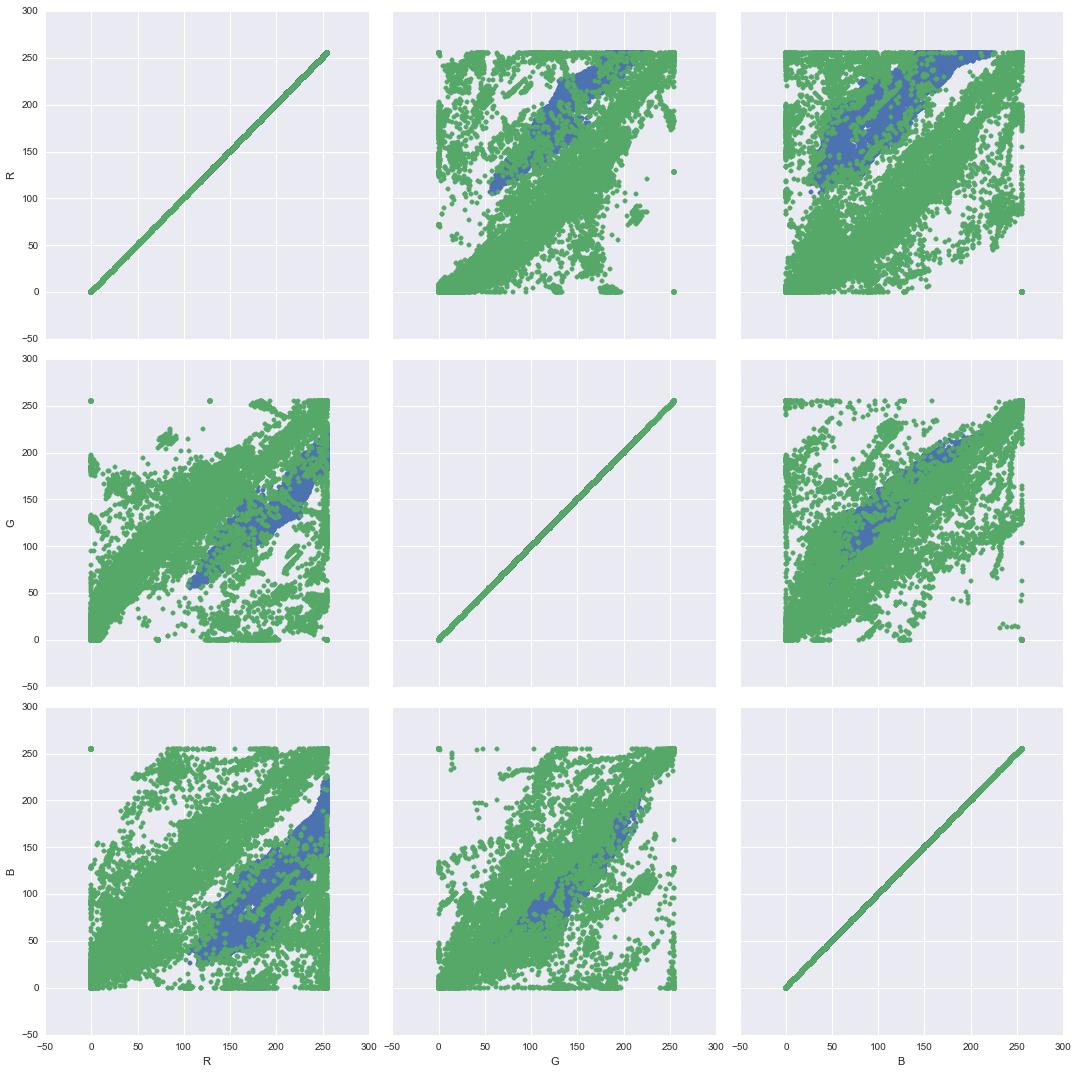

In [43]:
g = sns.PairGrid(skin.ix[rows], vars=["R", "G", "B"],
                 hue="y", aspect=1, size=5)
g.map(plt.scatter)

### Conclusion

The model seems to conclude that the best KNN value is 1.  This makes the model quite literally a "nearest neighbour algorithm", with only the very nearest data point being of importance.

While this almost seems too simplistic to be correct, with such a large data set it makes sense that the closest point is the best at predicting another.